# FitARMA Package

#### Cargamos las librerias auxiliares

In [22]:
library(ggplot2)
library(zoo)
library(forecast)
library(tseries)

Warning message:
"package 'tseries' was built under R version 3.3.3"

#### Cargamos la librería FitARMA

In [2]:
#install.packages('FitARMA')
library(FitARMA)

Warning message:
"package 'FitARMA' was built under R version 3.3.3"Loading required package: FitAR
Warning message:
"package 'FitAR' was built under R version 3.3.3"Loading required package: lattice
Warning message:
"package 'lattice' was built under R version 3.3.3"Loading required package: leaps
Warning message:
"package 'leaps' was built under R version 3.3.3"Loading required package: ltsa
Loading required package: bestglm
Warning message:
"package 'bestglm' was built under R version 3.3.3"
Attaching package: 'FitAR'

The following object is masked from 'package:forecast':

    BoxCox



#### Cargamos los datos

In [3]:
datos <- read.csv('monthly-traffic-fatalities-in-on.csv')
accidentes <- ts(datos, start = c(1960, 1), frequency = 12)

#### Función genérica para plotting de test vs pred a través de ggplot2

In [4]:
combine <- function(test, pred) {
  require(ggplot2)
  p <- ggplot() +
    geom_line(aes(x = index(as.zoo(test)), y = coredata(as.zoo(test)), colour = 'Test')) +
    geom_line(aes(x = index(as.zoo(test)), y = pred, colour = 'Prediccion')) +
    scale_color_manual(name = '', values = c('Test' = 'black', 'Prediccion' = 'red'),
                       labels = c('Test','Predicción'))
  p
}

#### Ajustamos estacionalmente la serie y volvemos a dividir en dos conjuntos

In [5]:
decomposition <- decompose(accidentes, type = 'additive')
accidentes.adj <- seasadj(decomposition) # Forecast
acc.train.adj <- window(accidentes.adj, start = c(1960,1), end = c(1973,12))
acc.test.adj <- window(accidentes.adj, start = c(1974,1))

#### Diferenciamos

In [6]:
accidentes.dif.adj <- diff(accidentes.adj) 
acc.train.dif.adj <- window(accidentes.dif.adj, start = c(1960,2), end = c(1973,12)) # Perdemos una observación
acc.test.dif.adj <- window(accidentes.dif.adj, start = c(1974,1))

#### ACF y PACF

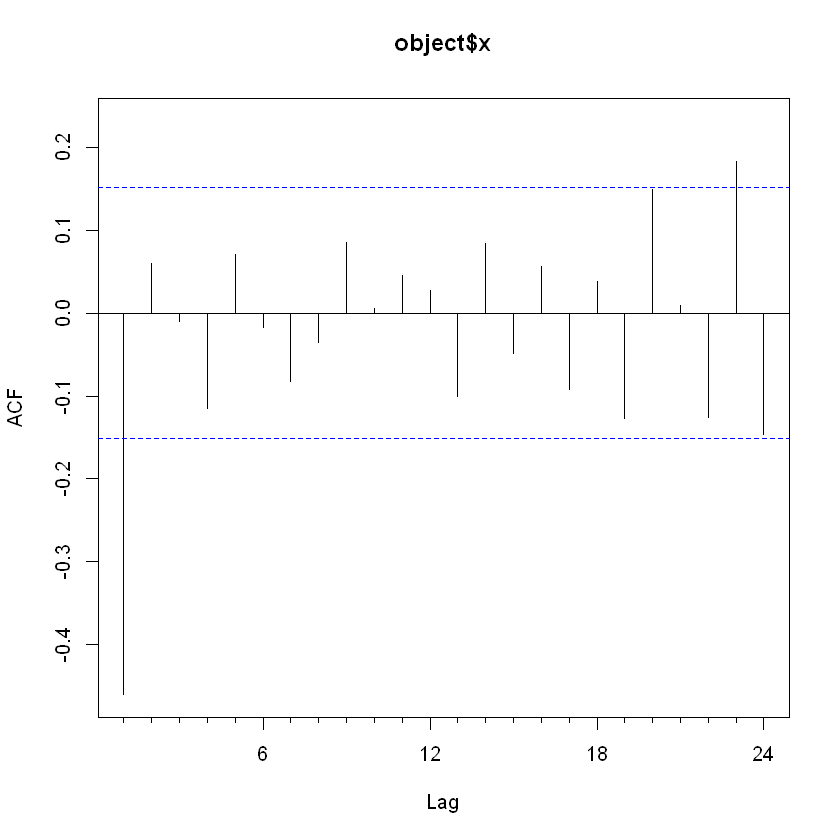

In [8]:
Acf(acc.train.dif.adj)

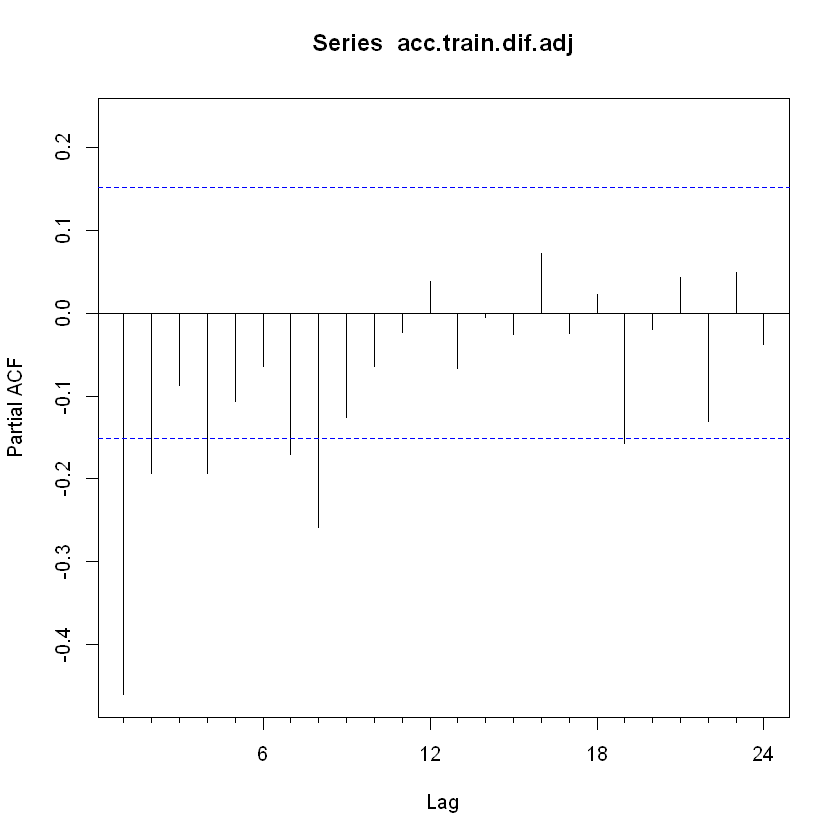

In [9]:
Pacf(acc.train.dif.adj)

#### ARMA(2,1) (FitARMA)

In [10]:
model.1 <- FitARMA(acc.train.dif.adj, order = c(2,0,1))
summary(model.1) # AIC = 939.5  Loglikelihood = -465.75

ARIMA(2,0,1)
length of series = 167 ,  number of parameters = 4
loglikelihood = -465.75 ,  aic = 939.5 ,  bic =  952


In [11]:
coef(model.1)

,MLE,sd,Z-ratio
phi(1),0.2259977,0.08360269,2.703235
phi(2),0.1443701,0.08246120,1.750764
theta(1),0.9477932,0.02999630,31.597007
mu,0.2586612,7.97254543,0.032444


In [12]:
model.1$racf

[1] -0.004687021  0.015384484 -0.009085387 -0.116608429  0.017959929
 [6] -0.042081107 -0.111886837 -0.027160255  0.116982750  0.097478955
[11]  0.101706926  0.045508019 -0.063242882  0.039717773 -0.039408916
[16] -0.013667360 -0.118419537 -0.071089556 -0.101970255  0.120273961
[21]  0.031028360 -0.062735567  0.121751485 -0.076519862  0.036663755
[26]  0.034552769 -0.115203306  0.015345457 -0.043336943 -0.017820373

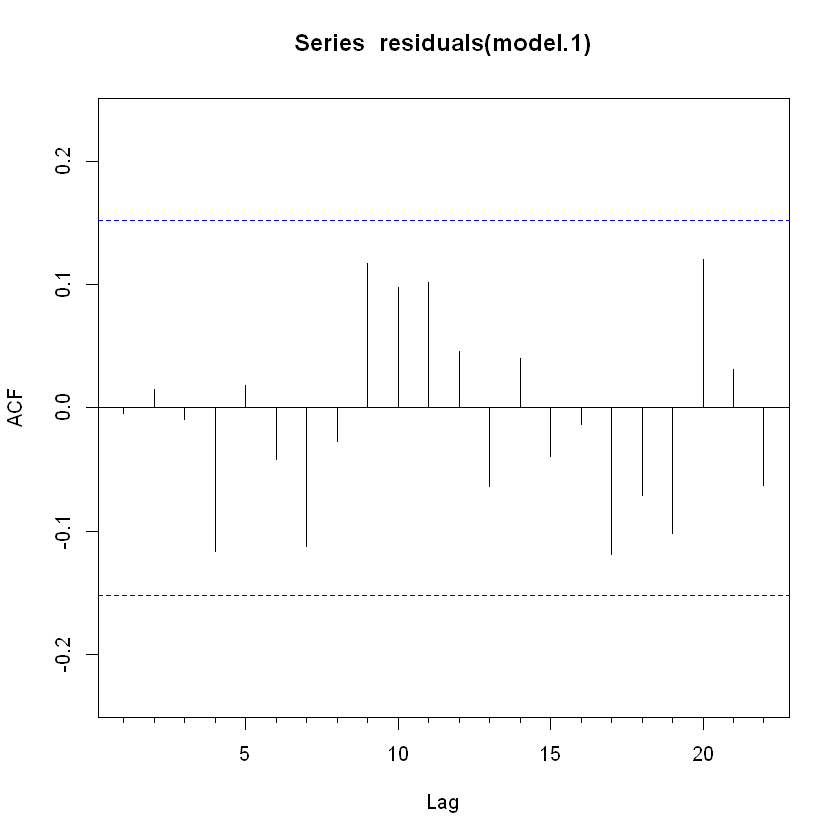

In [13]:
Acf(residuals(model.1))

In [14]:
model.1$LjungBoxQ

,m,Qm,pvalue
,1,0.00,0.9512680
,2,0.04,0.8334464
,3,0.06,0.8090040
,4,2.41,0.1203471
,5,2.47,0.2909812
,6,2.78,0.4268998
,7,4.99,0.2885692
,8,5.12,0.4015820
,9,7.56,0.2718923
,10,9.27,0.2337661


#### ARMA(2,1) (FitARMA) (MeanMLEQ = TRUE)

In [15]:
model.2 <- FitARMA(acc.train.dif.adj, order = c(2,0,1), MeanMLEQ =  TRUE)
summary(model.2) # AIC = 938.5  Loglikelihood = -465.27

ARIMA(2,0,1)  With mean MLE.
length of series = 167 ,  number of parameters = 4
loglikelihood = -465.27 ,  aic = 938.5 ,  bic =  951


In [16]:
coef(model.2)

,MLE,sd,Z-ratio
phi(1),0.2281884,0.08176180,2.79089249
phi(2),0.1438438,0.08108491,1.77398937
theta(1),0.9591174,0.02550060,37.61156596
mu,0.4039298,8.05657940,0.05013664


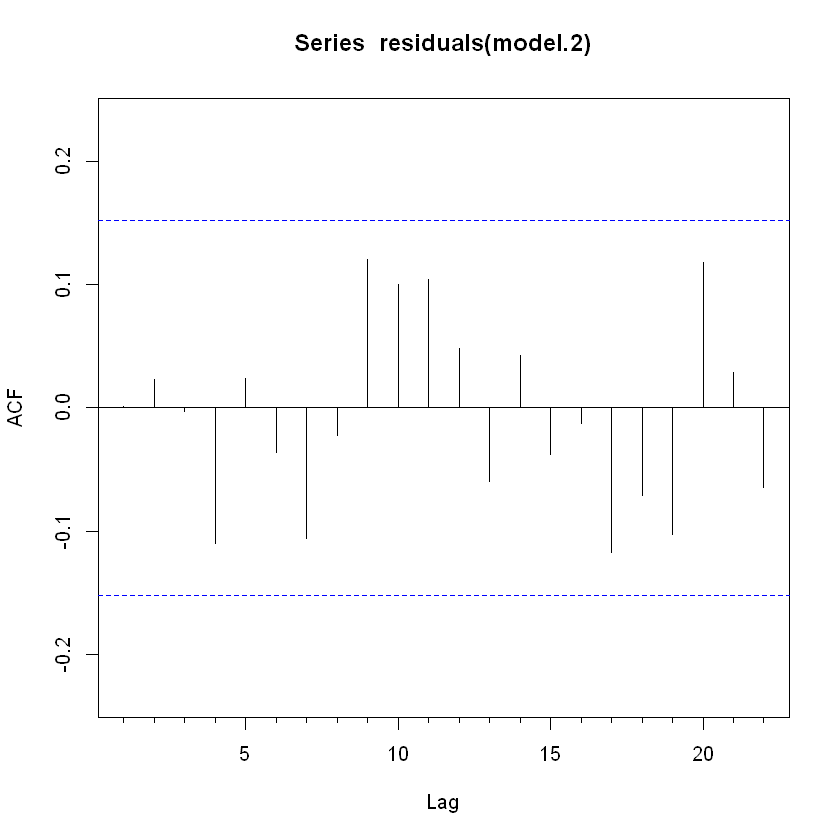

In [18]:
Acf(residuals(model.2))

In [19]:
model.1$LjungBoxQ

,m,Qm,pvalue
,1,0.00,0.9512680
,2,0.04,0.8334464
,3,0.06,0.8090040
,4,2.41,0.1203471
,5,2.47,0.2909812
,6,2.78,0.4268998
,7,4.99,0.2885692
,8,5.12,0.4015820
,9,7.56,0.2718923
,10,9.27,0.2337661


Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


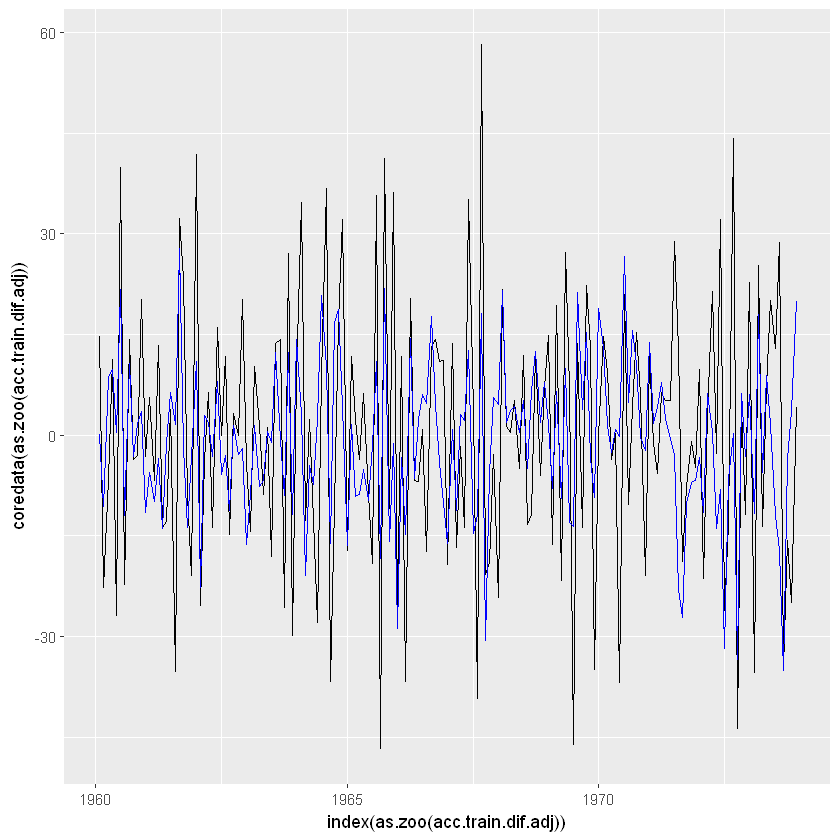

In [20]:
p <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train.dif.adj)),
                y = coredata(as.zoo(acc.train.dif.adj))), col = 'black') +
  geom_line(aes(x = index(as.zoo(fitted(model.2))), y = coredata(as.zoo(fitted(model.2)))), col = 'blue')
p

#### Jugando con pApprox

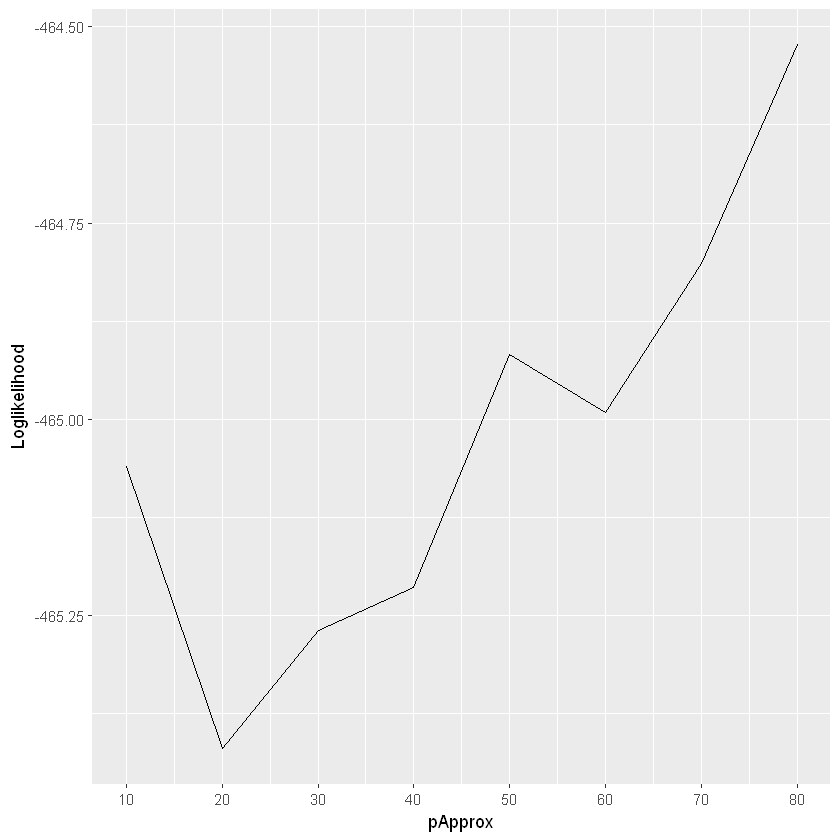

In [21]:
pApprox.metrics <- c()
pApprox.values <- seq(10, 80, 10)

for (i in pApprox.values) {
  model <- FitARMA(acc.train.dif.adj, order = c(2,0,1), MeanMLEQ = TRUE, pApprox = i)
  pApprox.metrics <- c(pApprox.metrics, model$loglikelihood)
}
pApp <- data.frame(pApprox = pApprox.values, LogLikelihood = pApprox.metrics)

p <- ggplot() +
  geom_line(data = pApp, aes(x = pApprox, y = LogLikelihood)) +
  xlab('pApprox') + ylab('Loglikelihood') +
  scale_x_continuous(breaks = pApprox.values)
p

#### ARMA(2,1) (FitARMA) (MeanMLEQ = TRUE)

In [23]:
model.3 <- FitARMA(acc.train.dif.adj, order = c(2,0,1), MeanMLEQ =  TRUE, pApprox = 80)
summary(model.3) # AIC = 937  Loglikelihood = -464.52

ARIMA(2,0,1)  With mean MLE.
length of series = 167 ,  number of parameters = 4
loglikelihood = -464.52 ,  aic = 937 ,  bic =  949.5


In [24]:
coef(model.3)

,MLE,sd,Z-ratio
phi(1),0.2466925,0.07792543,3.16575124
phi(2),0.1667451,0.07784360,2.14205329
theta(1),0.9859370,0.01368159,72.06306074
mu,0.3643851,10.53794494,0.03457838


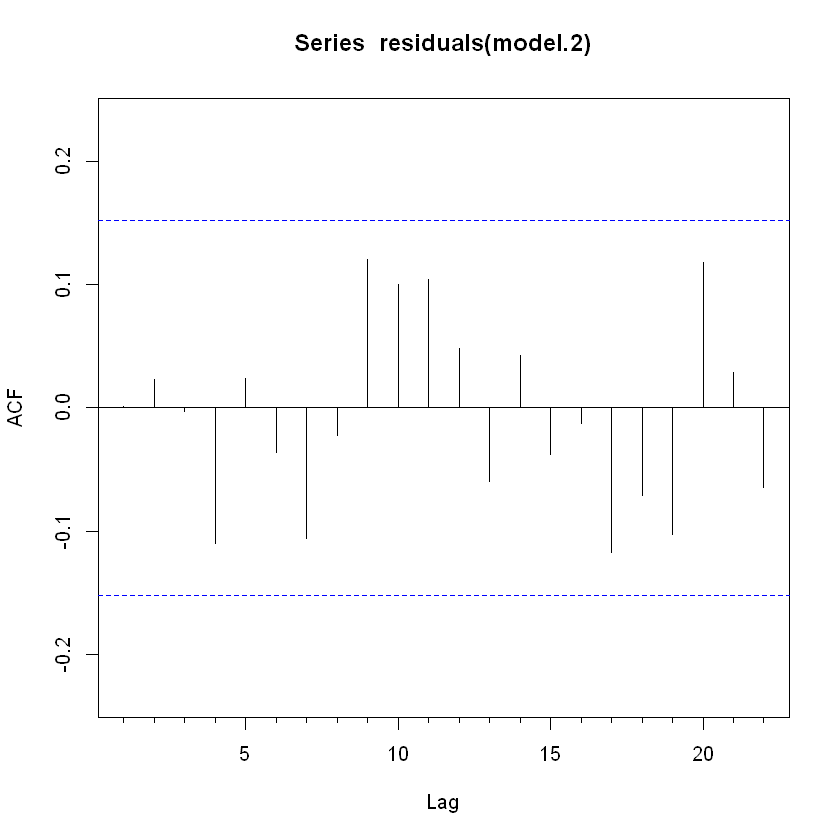

In [25]:
Acf(residuals(model.2))

In [26]:
model.1$LjungBoxQ

,m,Qm,pvalue
,1,0.00,0.9512680
,2,0.04,0.8334464
,3,0.06,0.8090040
,4,2.41,0.1203471
,5,2.47,0.2909812
,6,2.78,0.4268998
,7,4.99,0.2885692
,8,5.12,0.4015820
,9,7.56,0.2718923
,10,9.27,0.2337661


#### Comparando tiempos para ARMAs entre librerias

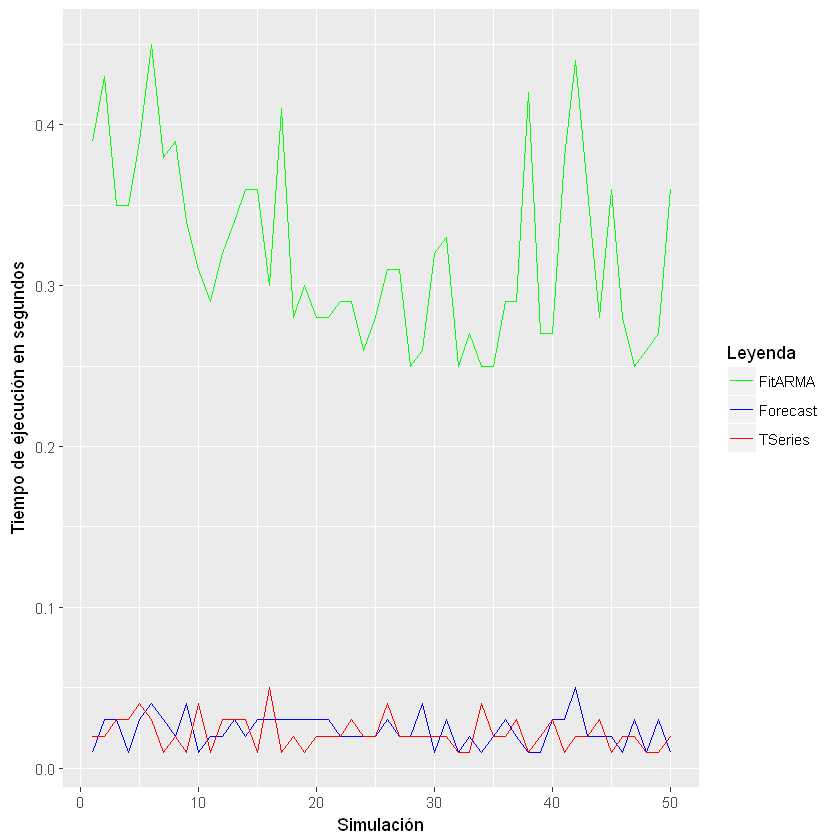

In [28]:
set.seed(1006)

p <- 2; q <- 1
timing.forecast <- c()
timing.tseries <- c()
timing.fitarma <- c()

for (i in 1:50) {
    timing.fitarma <- c(timing.fitarma,
                        as.numeric(system.time(FitARMA(acc.train.dif.adj, order = c(p,0,q)))[3]))
    
    timing.forecast <- c(timing.forecast,
                         as.numeric(system.time(Arima(acc.train.dif.adj, order = c(p,0,q)))[3]))
    
    timing.tseries <- c(timing.tseries,
                        as.numeric(system.time(arma(acc.train.dif.adj, order = c(p, q)))[3]))
}


timing.plot <- ggplot() +
  geom_line(aes(x = 1:length(timing.forecast), y = timing.forecast, colour = 'Forecast')) +
  geom_line(aes(x = 1:length(timing.tseries), y = timing.tseries, colour = 'TSeries')) +
  geom_line(aes(x = 1:length(timing.fitarma), y = timing.fitarma, colour = 'FitARMA')) +
  xlab('Simulación') + ylab('Tiempo de ejecución en segundos') +
  scale_color_manual(name = 'Leyenda', values = c('TSeries' = 'red', 'Forecast' = 'blue',
                                                  'FitARMA' = 'green'),
                     labels = c('FitARMA', 'Forecast', 'TSeries'))
timing.plot